# Zestaw zadań 1: Rozkłady zmiennych losowych dyskretnych

In [97]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

### Funkcje do wykorzystania

In [98]:
def vizualize_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca indeks z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. X) oraz pojedynczą kolumnę
        z prawdopodobieństwami poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. P(X)).
    cdf: pandas.DataFrame
        Tablica zawierająca index w formacie pandas.IntervalIndex z przedziałami wartości zmiennej losowej i nadaną nazwą zmiennej (np. X)
        oraz pojedynczą kolumnę wartościami dystrybuanty dla poszczególnych przedziałów o nadanej nazwie bazującej na nazwie zmiennej (np. F(X)).
    mask: numpy.ndarray
        Macierz logiczna 1D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """

    pmf_name = pmf.columns[0]
    pmf_plot = pmf.copy(deep=True)
    
    cdf_name = cdf.columns[0]
    cdf_index = cdf.index.copy(deep=True)
    cdf_index_range = cdf.index[-1].left - cdf.index[0].right
    cdf_index.values[0] = pd.Interval(cdf.index[0].right - 0.1*cdf_index_range, cdf.index[0].right, closed=cdf.index.closed)
    cdf_index.values[-1] = pd.Interval(cdf.index[-1].left, cdf.index[-1].left + 0.1*cdf_index_range, closed=cdf.index.closed)
    cdf_plot = pd.DataFrame(data=cdf.values, index=cdf_index, columns=[cdf_name])
    cdf_plot.index.name = cdf.index.name
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta zmiennej losowej dyskretnej")

    if mask is None:
        axes[0].scatter(pmf.index, pmf_plot[pmf_name], color="blue")
        axes[0].vlines(pmf.index, 0, pmf_plot[pmf_name], color="blue")
    else:
        axes[0].scatter(pmf.index[~mask], pmf_plot[pmf_name][~mask], color="red")
        axes[0].scatter(pmf.index[mask], pmf_plot[pmf_name][mask], color="green")
        axes[0].vlines(pmf.index[~mask], 0, pmf_plot[pmf_name][~mask], color="red")
        axes[0].vlines(pmf.index[mask], 0, pmf_plot[pmf_name][mask], color="green")
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].set_xlabel(pmf_plot.index.name)
    axes[0].set_ylabel(pmf_name)

    axes[1].hlines(cdf_plot[cdf_name], cdf_plot.index.left, cdf_plot.index.right, color="grey")
    axes[1].scatter(cdf_plot.index.left[1:], cdf_plot[cdf_name][1:], color="grey")
    axes[1].scatter(cdf_plot.index.right[:-1], cdf_plot[cdf_name][:-1], color='white', edgecolor="grey")
    axes[1].set_title("Dystrybuanta")
    axes[1].set_xlabel(cdf_plot.index.name)
    axes[1].set_ylabel(cdf_name)

### Zadanie 1: Przykładowy dyskretny rozkład prawdopodobieństwa [10 pkt]
Zmienna losowa X ma funkcję rozkładu prawdopodobieństwa daną wzorem:

$$P(X) = \begin{cases}
0.1\text{ dla }x=1\\
0.05\text{ dla }x=3\\
0.15\text{ dla }x=5\\
0.25\text{ dla }x=7\\
0.2\text{ dla }x=9\\
0.15\text{ dla }x=11\\
0.1\text{ dla }x=13\\
\end{cases}$$

#### a) Funkcja rozkładu prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej X w formie tablicy `r1p` o następującej strukturze:

> Indeks:</br>
> X - warianty przyjmowane przez zmienną X.</br>

> Kolumny:</br>
> P(X) - prawdopodobieństwo poszczególnych wariantów.

In [99]:
idx = np.linspace(1,13,7)
pr = np.array([0.1,0.05,0.15,0.25,0.2,0.15,0.1])
r1p = pd.DataFrame(data=pr, index=idx, columns=["P(X)"])
r1p.index.name = "X"

In [100]:
# Komórka testowa
assert type(r1p) == pd.DataFrame
assert r1p.shape == (7, 1)
assert list(r1p.columns) == ["P(X)"]
assert r1p.index.name == 'X'
assert np.isclose(np.sum(r1p.index.values), 49)
assert np.isclose(np.sum(r1p["P(X)"]), 1)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej X w formie tablicy `r1f` o następującej strukturze:

> Indeks:</br>
> X - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(X) -wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.

In [101]:
breaks = np.hstack([-np.inf, r1p.index, np.inf])
r_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r_cumulative_probabilities = np.cumsum(np.hstack([0,pr]))
r1f = pd.DataFrame(data=r_cumulative_probabilities, index=r_intervals, columns=["F(X)"])
r1f.index.name = 'X'

In [102]:
# Komórka testowa
assert type(r1f) == pd.DataFrame
assert r1f.shape == (8, 1)
assert list(r1f.columns) == ["F(X)"]
assert r1f.index.name == 'X'
assert type(r1f.index) == pd.core.indexes.interval.IntervalIndex
assert r1f.index.closed == 'left'
assert np.isclose(r1f["F(X)"].min(), 0.0)
assert np.isclose(r1f["F(X)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej X w formie wykresów.

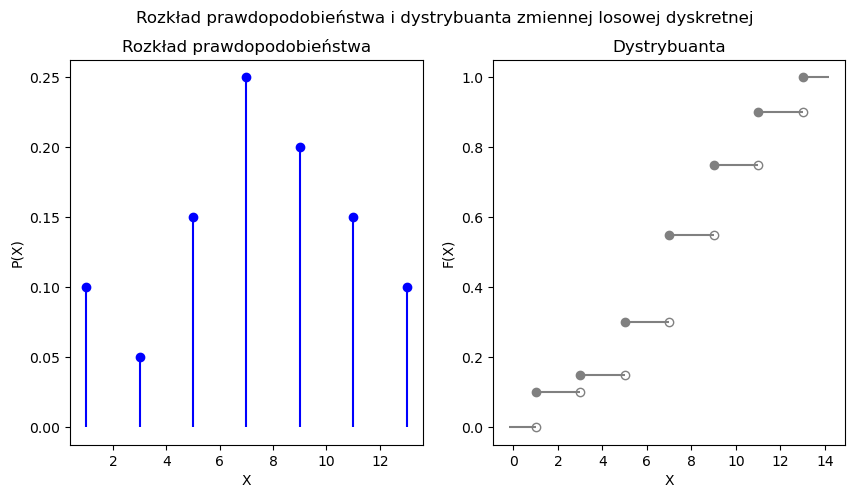

In [103]:
vizualize_discrete_distribution(r1p,r1f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej X - wartość średnia (`r1_mean`), wariancja (`r1_var`) i odchylenie standardowe (`r1_std`).

In [104]:
# Wartość oczekiwana
r1_mean = np.sum(r1p.index*r1p["P(X)"].values)

In [105]:
# Wariancja
r1_var = np.sum((r1p.index-r1_mean)**2*r1p["P(X)"].values)

In [106]:
# Odchylenie standardowe
r1_std = np.sqrt(r1_var)

In [107]:
# Komórka testowa
assert np.isclose(r1_mean, 7.499999999999999)
assert np.isclose(r1_var, 11.55)
assert np.isclose(r1_std, 3.398529093593286)

### Zadanie 2: Rozkład dwumianowy [10 pkt]

Zmienna losowa Y ma rozkład dwumianowy z prawdopodobieństwem sukcesu $p=0.5$ i liczbą doświadczeń $n=10$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Y w formie tablicy `r2p` o następującej strukturze:

> Indeks:</br>
> Y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny:</br>
> P(Y) - prawdopodobieństwo poszczególnych wariantów.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Y wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [108]:
p = 0.5
n = 10
idx = np.arange(0,n+1)
pr = sp.stats.binom.pmf(idx,n,p)
r2p = pd.DataFrame(data=pr,index=idx,columns=["P(Y)"])
r2p.index.name = "Y"

In [109]:
# Komórka testowa
assert type(r2p) == pd.DataFrame
assert r2p.shape == (11, 1)
assert list(r2p.columns) == ["P(Y)"]
assert r2p.index.name == 'Y'
assert np.isclose(np.sum(r2p.index.values), 55)
assert np.isclose(np.sum(r2p["P(Y)"]), 1.0)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Y w formie tablicy `r2f` o następującej strukturze:

> Indeks:</br>
>  Y - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Y) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [110]:
breaks = np.hstack([-np.inf, r2p.index, np.inf])
r_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r_cumulative_probabilities = sp.stats.binom.cdf(idx,n,p)
r_cumulative_probabilities = np.hstack([0,r_cumulative_probabilities])
r2f = pd.DataFrame(data=r_cumulative_probabilities, index=r_intervals, columns=["F(Y)"])
r2f.index.name = "Y"

In [111]:
# Komórka testowa
assert type(r2f) == pd.DataFrame
assert r2f.shape == (12, 1)
assert list(r2f.columns) == ["F(Y)"]
assert r2f.index.name == 'Y'
assert type(r2f.index) == pd.core.indexes.interval.IntervalIndex
assert r2f.index.closed == 'left'
assert np.isclose(r2f["F(Y)"].min(), 0.0)
assert np.isclose(r2f["F(Y)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Y w formie wykresów.

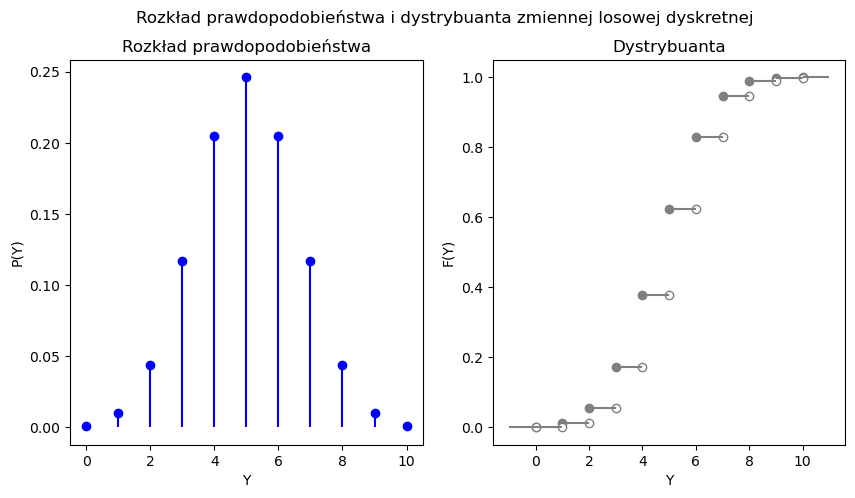

In [112]:
vizualize_discrete_distribution(r2p, r2f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Y - wartość średnia (`r2_mean`), wariancja(`r2_var`) i odchylenie standardowe (`r2_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [114]:
# Wartość oczekiwana
r2_mean = sp.stats.binom.mean(n,p)

In [115]:
# Wariancja
r2_var = sp.stats.binom.var(n,p)

In [116]:
# Odchylenie standardowe
r2_std = sp.stats.binom.std(n,p)

In [117]:
# Komórka testowa
assert np.isclose(r2_mean, 5.0)
assert np.isclose(r2_var, 2.5)
assert np.isclose(r2_std, 1.5811388300841898)

### Zadanie 3: Rozkład Poissona [10 pkt]

Zmienna losowa Z ma rozkład Poissona z parametrem $\lambda=15$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Z w formie tablicy `r3p` o następującej strukturze:

> Indeks:</br>
> Z - warianty przyjmowane przez zmienną Z.</br>

> Kolumny:</br>
> P(Z) - prawdopodobieństwo poszczególnych wariantów.

W tablicy zawrzyj tylko warianty zmiennej losowej Z od 0 do wartości przy której suma prawdopodobieństw uwzględnionych wariantów przekracza 0.9999.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [118]:
lam = 15
z_variants = np.arange(0,101)
r_probabilities = sp.stats.poisson.pmf(z_variants, lam)
r_cumulative_probabilities = sp.stats.poisson.cdf(z_variants, lam)
idx = int(sp.stats.poisson.ppf(0.9999, lam))
r3p = pd.DataFrame(data=r_probabilities[:idx+1], index=z_variants[:idx+1], columns=["P(Z)"])
r3p.index.name = "Z"

In [119]:
# Komórka testowa
assert type(r3p) == pd.DataFrame
assert r3p.shape == (32, 1)
assert list(r3p.columns) == ["P(Z)"]
assert r3p.index.name == 'Z'
assert np.isclose(np.sum(r3p.index.values), 496)
assert np.isclose(np.sum(r3p["P(Z)"]), 0.9999)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Z w formie tablicy `r3f` o następującej strukturze:

> Indeks:</br>
> Z - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Z) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [120]:
breaks = np.hstack([-np.inf, r3p.index, np.inf])
r_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r_cumulative_probabilities = sp.stats.poisson.cdf(z_variants[:idx+1],lam)
r_cumulative_probabilities = np.hstack([0,r_cumulative_probabilities])
r3f = pd.DataFrame(data=r_cumulative_probabilities, index=r_intervals, columns=["F(Z)"])
r3f.index.name = "Z"

In [121]:
# Komórka testowa
assert type(r3f) == pd.DataFrame
assert r3f.shape == (33, 1)
assert list(r3f.columns) == ["F(Z)"]
assert r3f.index.name == 'Z'
assert type(r3f.index) == pd.core.indexes.interval.IntervalIndex
assert r3f.index.closed == 'left'
assert np.isclose(r3f["F(Z)"].min(), 0.0)
assert np.isclose(r3f["F(Z)"].max(), 0.9999)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Z w formie wykresów.

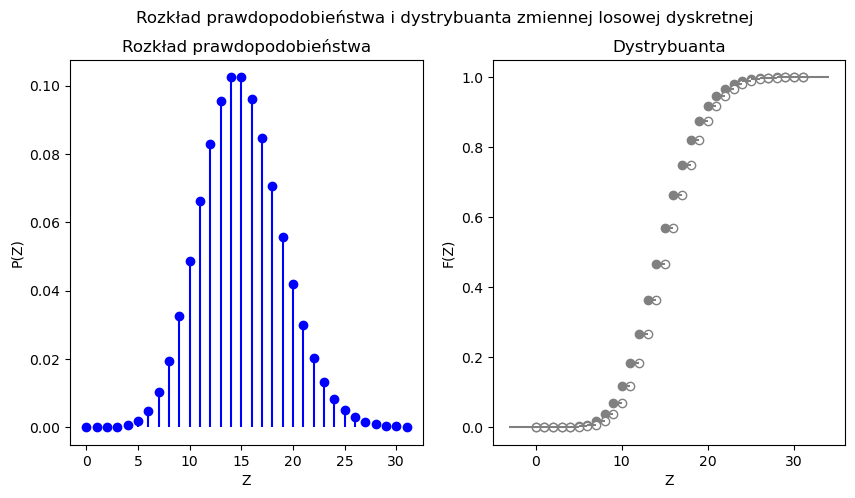

In [122]:
vizualize_discrete_distribution(r3p,r3f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Z - wartość średnia (`r3_mean`), wariancja(`r3_var`) i odchylenie standardowe (`r3_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [123]:
# Wartość oczekiwana
r3_mean = sp.stats.poisson.mean(lam)

In [124]:
# Wariancja
r3_var = sp.stats.poisson.var(lam)

In [125]:
# Odchylenie standardowe
r3_std = sp.stats.poisson.std(lam)

In [126]:
# Komórka testowa
assert np.isclose(r3_mean, 15.0)
assert np.isclose(r3_var, 15.0)
assert np.isclose(r3_std, 3.872983346207417)

### Zadanie 4: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]
Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>5)
- P(1<Y<=6)
- P(Z<=12 | Z>21)

Wyniki zapisz kolejno do zmiennych `p1`, `p2` i `p3` oraz przedstaw na wykresach korzystając z funkcji `vizualize_discrete_distribution()`.

#### a) P(X>5)

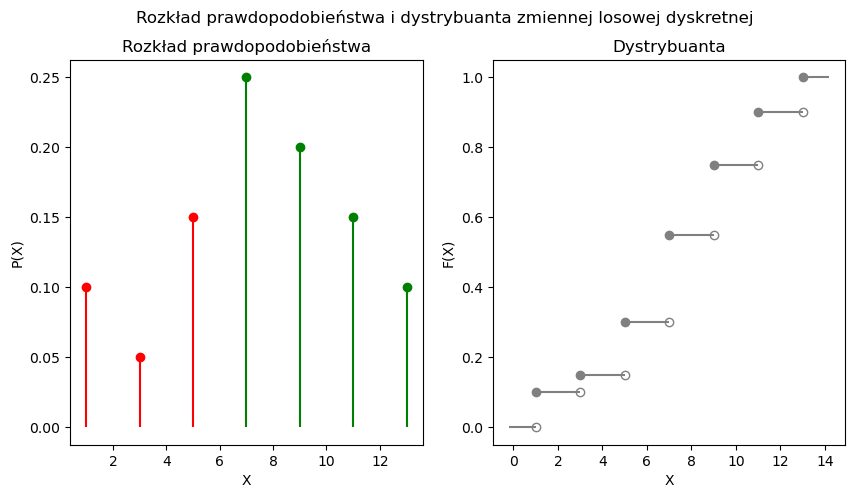

In [127]:
mask = r1p.index > 5
p_mask = r1p["P(X)"].values[mask]
p1 = np.sum(p_mask)
vizualize_discrete_distribution(r1p,r1f,mask)

In [128]:
# Komórka testowa
assert np.isclose(p1, 0.7)

#### b) P(1<Y<=6)

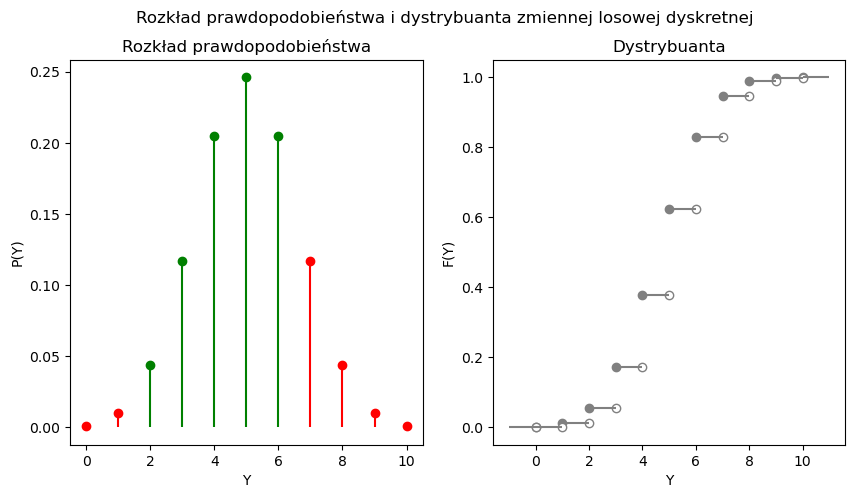

In [129]:
mask = (r2p.index > 1) & (r2p.index <= 6)
p_mask = r2p["P(Y)"].values[mask]
p2 = np.sum(p_mask)
vizualize_discrete_distribution(r2p,r2f,mask)

In [130]:
# Komórka testowa
assert np.isclose(p2, 0.8173828125)

#### c) P(Z<=12 | Z>21)

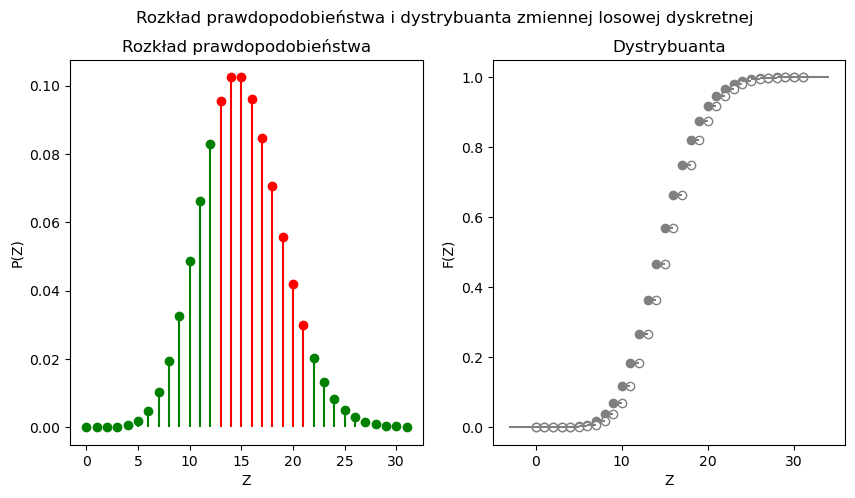

In [136]:
mask = (r3p.index > 12) & (r3p.index <= 21)
p_mask = r3p["P(Z)"].values[mask]
p3 = 1 - sum(p_mask)
vizualize_discrete_distribution(r3p,r3f,~mask)

In [137]:
# Komórka testowa
assert np.isclose(p3, 0.32071743985184814)